# TSF-TASK 3-EXPLORATORY DATA ANALYSIS-RETAIL
# GRIP AUGUST '21
# NAME:AMRIN FATHIMA

# Importing libraries and reading the dataset

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [114]:
path=r'C:\Users\Amrin\Downloads\SampleSuperstore.csv'
data=pd.read_csv(path)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# DATA EXPLORATION

In [115]:
data.shape

(9994, 13)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [117]:
#Checking for missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [118]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [119]:
#Checking for duplicate entries
data.duplicated().sum()

17

In [120]:
#Getting rid of duplicates
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


We can see that 17 rows have been dropped.

In [121]:
#Dropping unnecessary columns
df=data.drop(columns='Postal Code',axis=1)

In [122]:
#Looking for correlation between variables
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


None of  the variables have a strong positive or negative correlation.

*Sales and Profit have a positive correlation.

*Discount has a negative correlation with Sales and Profit.

*Quantity and Discount are less correlated.

*Quantity and Sales are moderately correlated.


<AxesSubplot:>

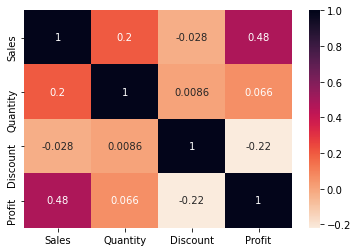

In [123]:
#Visulaising correlation using heatmap
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

In [124]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

These are the total number of unique values in each column.

# Plotting countmaps for each category

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

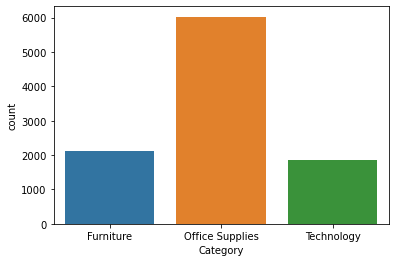

In [125]:
sns.countplot(df['Category'])

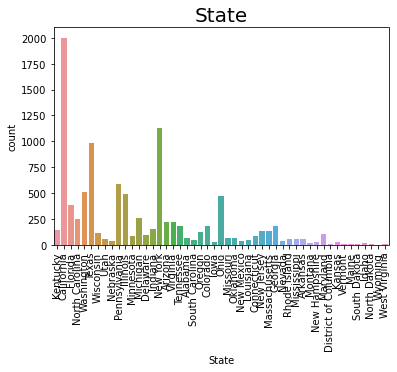

In [82]:
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)
plt.show()

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

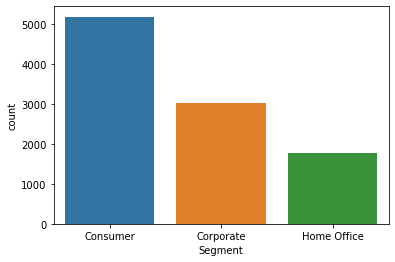

In [126]:
sns.countplot(df['Segment'])

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


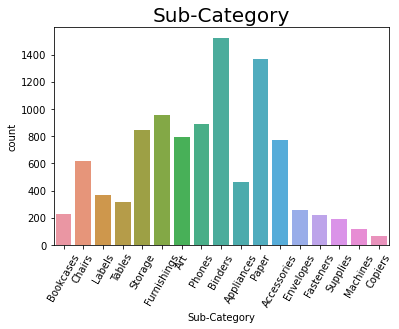

In [127]:
sns.countplot(df['Sub-Category'])
plt.xticks(rotation=60)
plt.title('Sub-Category',fontsize=20)
plt.show()

c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\amrin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

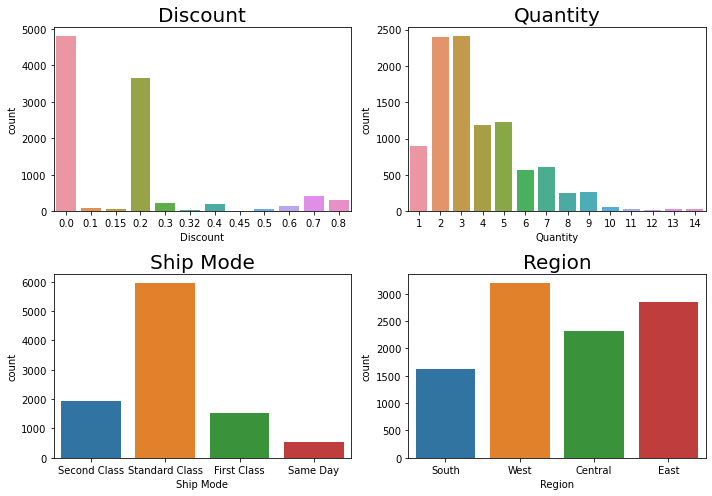

In [128]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Discount'],ax=axs[0][0])
sns.countplot(df['Quantity'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Discount',fontsize=20)
axs[0][1].set_title('Quantity',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

<AxesSubplot:xlabel='Profit', ylabel='count'>

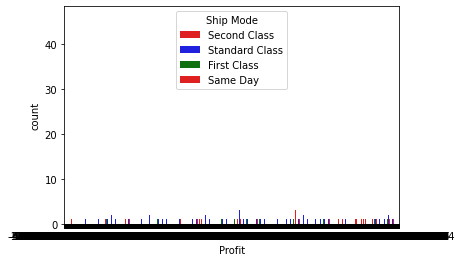

In [129]:
sns.countplot(x='Profit' ,hue = 'Ship Mode', data =df,palette=['red','blue','green'])

# Analysing the Dataset by States

In [130]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

In [131]:
state=df['State'].value_counts()

In [132]:
state.shape

(49,)

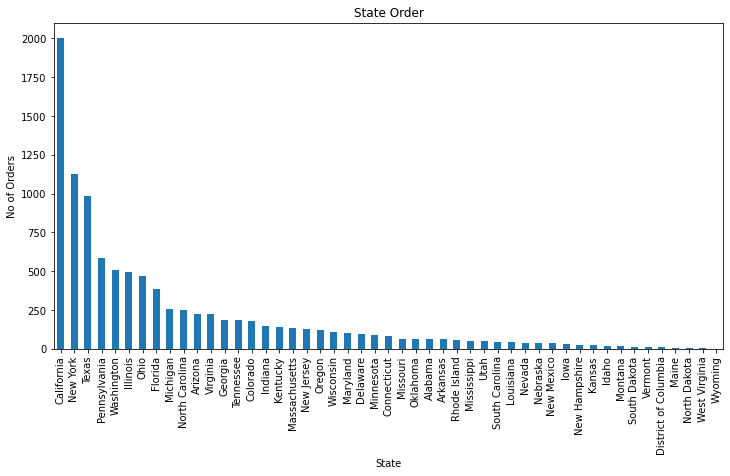

In [133]:
state.plot(kind='bar',figsize=(12,6))
plt.title("State Order")
plt.ylabel('No of Orders')
plt.xlabel('State')
plt.show()

We can see that California,New York and Texas have the highest number of orders.Wyoming has the lowest number of orders.

In [134]:
#Avg. number of orders
state.mean()

203.9591836734694

In [135]:
state1= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
state1.head()

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351


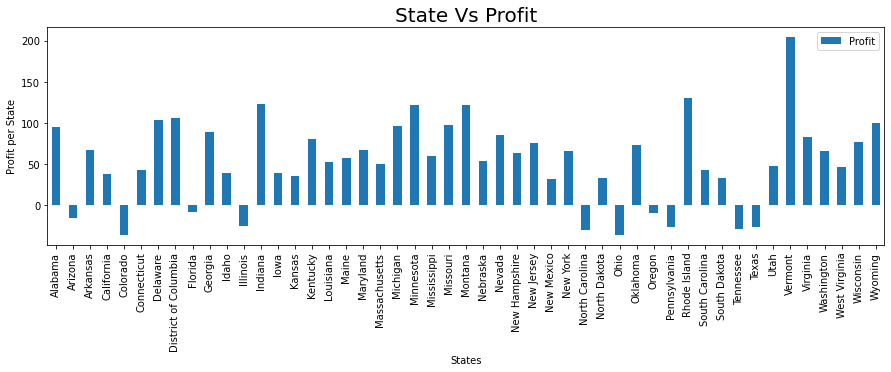

In [136]:
state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State Vs Profit', fontsize = 20)
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.show()

From the above graph,we can see that Vermont and Rhode Island have the greatest profit per state.Ohio and Colorado have the lowest profit per state.

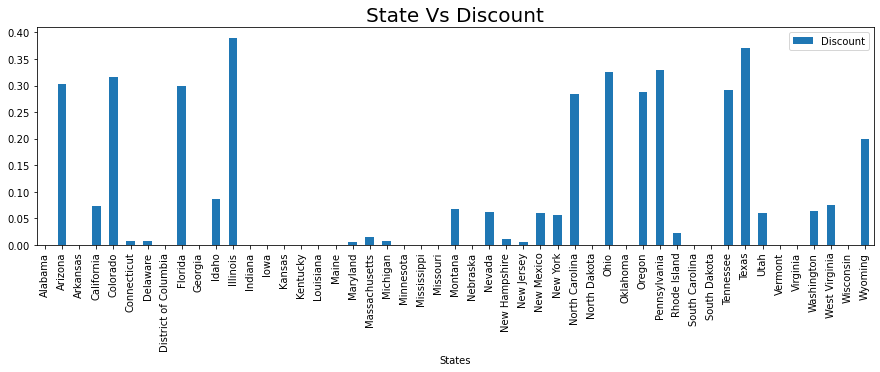

In [137]:
state1[['Discount']].plot(kind = 'bar', figsize = (15,4))
plt.title('State Vs Discount', fontsize = 20)
plt.xlabel('States')
plt.show()

Illinois and Texas have the highest rates of discount. 

# Analysing the Data by Cities

In [138]:
city=df['City'].value_counts()
city.head()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: City, dtype: int64

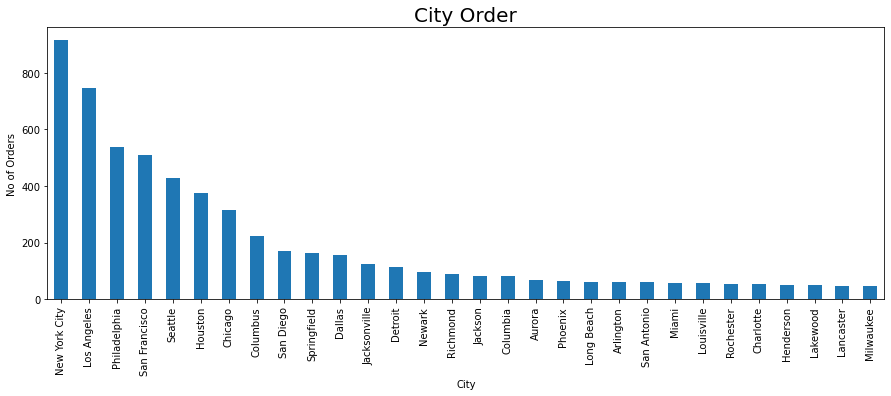

In [139]:

city.head(30).plot(kind='bar',figsize=(15,5))
plt.title("City Order",fontsize=20)
plt.ylabel('No of Orders')
plt.xlabel('City')
plt.show()

In [140]:
#Avg. number of orders
city.mean()

18.821092278719398

In [141]:
city.shape

(531,)

In [142]:
city1= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
city1.head()

,Sales,Discount,Profit
City,,,
Aberdeen,25.500000,0.000000,6.630000
Abilene,1.392000,0.800000,-3.758400
Akron,129.999333,0.357143,-8.887410
Albuquerque,158.582857,0.057143,45.292007
Alexandria,344.973125,0.000000,19.913644


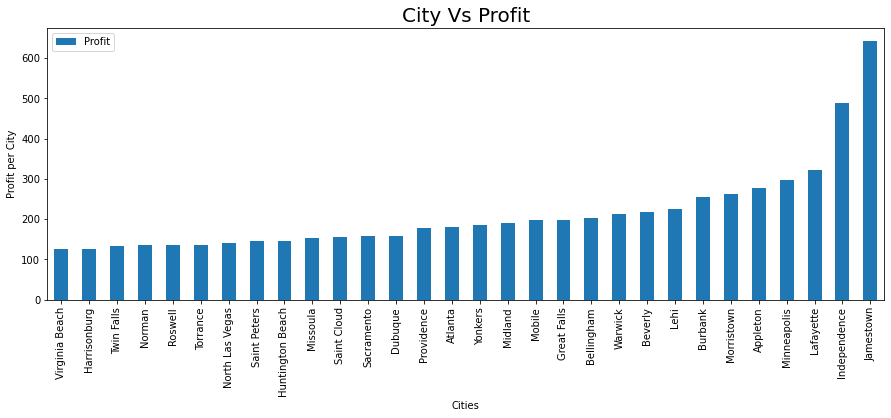

In [143]:
city1=city1.sort_values('Profit')
city1[['Profit']].tail(30).plot(kind = 'bar', figsize = (15,5))
plt.title('City Vs Profit', fontsize = 20)
plt.ylabel('Profit per City')
plt.xlabel('Cities')
plt.show()

Highest Profit per city is found at Jamestown.

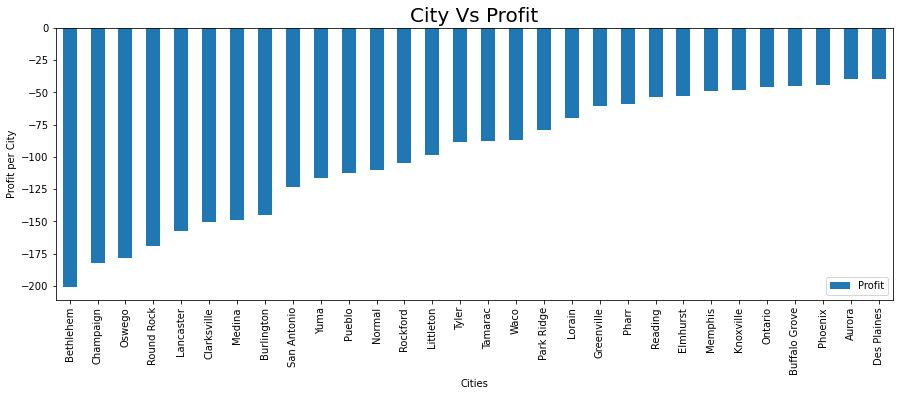

In [144]:
city1[['Profit']].head(30).plot(kind = 'bar', figsize = (15,5))
plt.title('City Vs Profit', fontsize = 20)
plt.ylabel('Profit per City')
plt.xlabel('Cities')
plt.show()

Lowest Profit per City is found at Betlehem.

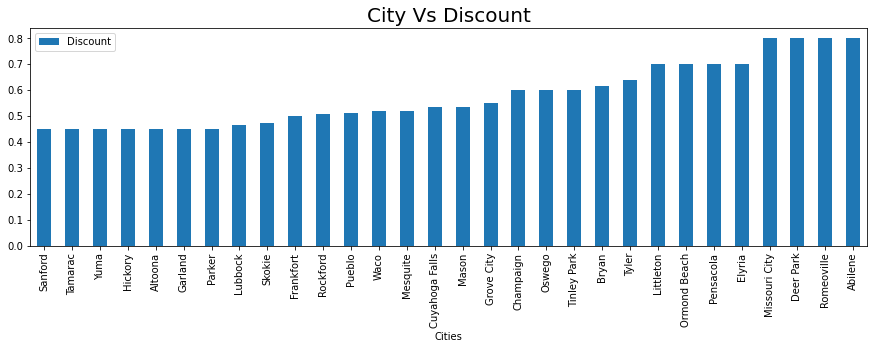

In [145]:
city1=city1.sort_values('Discount')
city1[['Discount']].tail(30).plot(kind = 'bar', figsize = (15,4))
plt.title('City Vs Discount', fontsize = 20)
plt.xlabel('Cities')
plt.show()

Abilene,Missouri City,Romeville and Deer Park have the highest discount rates.

# Analysing data by Ship Mode

In [146]:
ship=df['Ship Mode'].value_counts()
ship.head()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [147]:
ship1= df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
ship1.head()

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


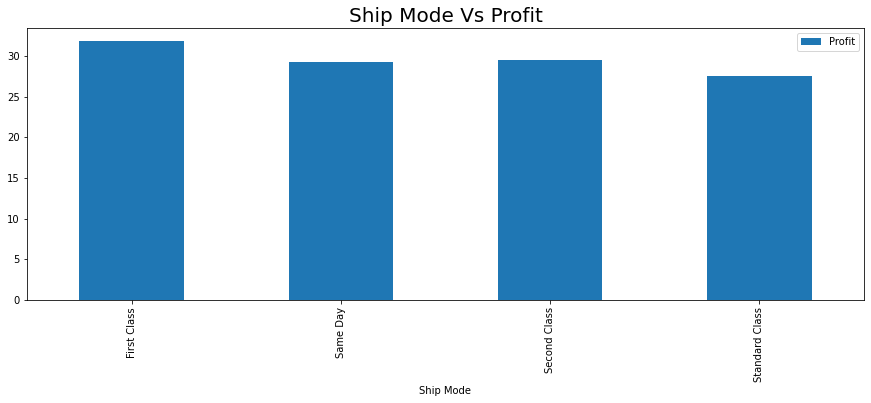

In [148]:
ship1[['Profit']].plot(kind = 'bar', figsize = (15,5))
plt.title('Ship Mode Vs Profit', fontsize = 20)
plt.xlabel('Ship Mode')
plt.show()

First Class has the greatest Profit.
Lowest Profit:Standard Class

In [149]:
Dis=df.groupby(['Discount'])[['Profit','Sales']].mean()

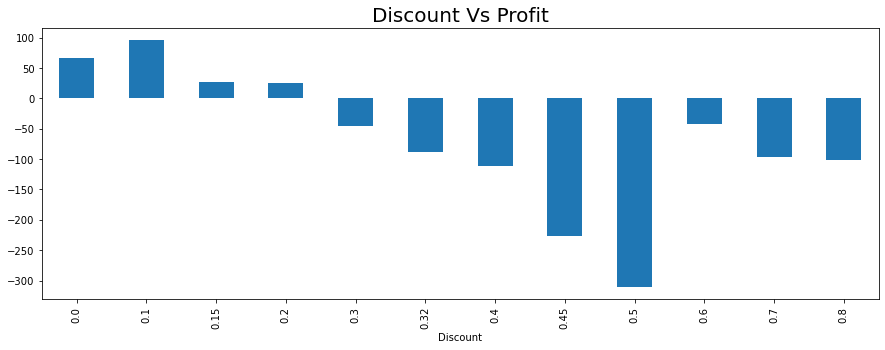

In [150]:
Dis['Profit'].plot(kind = 'bar', figsize = (15,5))
plt.title('Discount Vs Profit', fontsize = 20)
plt.xlabel('Discount')
plt.show()

The lowest profit occurs at the discount rate of 0.5.

# RESULTS AND CONCLUSION
AREAS WITH THE LOWEST PROFIT:

CITY:Betlehem

STATE:Ohio,Colorado

SHIP MODE:Standard class

DISCOUNT RATE:0.5

AREAS WITH HIGH NUMBER OF ORDERS:

CITY:NEW YORK CITY,LOS ANGELES,PHILADELPHIA,SAN FRANCISCO

STATE:CALIFORNIA,NEW YORK,TEXAS

SHIP MODE:STANDARD

DISCOUNT TYPE:0%

CONCLUSIONS:

1)Standard Class Ship Mode has the highest number of Orders but the lowest profit so we can look into maximizing profit in it.

2)States like Vermonte,Rhode Island generate high profits but have very low sales.So maximizing sales in these regions can increase profit.

3)California has the highest number of Sales but the profit is average.We have to try to maximize profits here.